We are using Support Vector Machines to determine if team and is_outdoors is a predictor
------- HOME AND AWAY
---------------
Model Accuracy: 0.6015625
---------------
Confusion Matrix:
[[42 29]
 [22 35]]
---------------
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.59      0.62        71
           1       0.55      0.61      0.58        57

    accuracy                           0.60       128
   macro avg       0.60      0.60      0.60       128
weighted avg       0.61      0.60      0.60       128

------- AWAY ONLY
---------------
Model Accuracy: 0.546875
---------------
Confusion Matrix:
[[13 14]
 [15 22]]
---------------
Classification Report
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        27
           1       0.61      0.59      0.60        37

    accuracy                           0.55        64
   macro avg       0.54      0.54      0.54        64
weighte

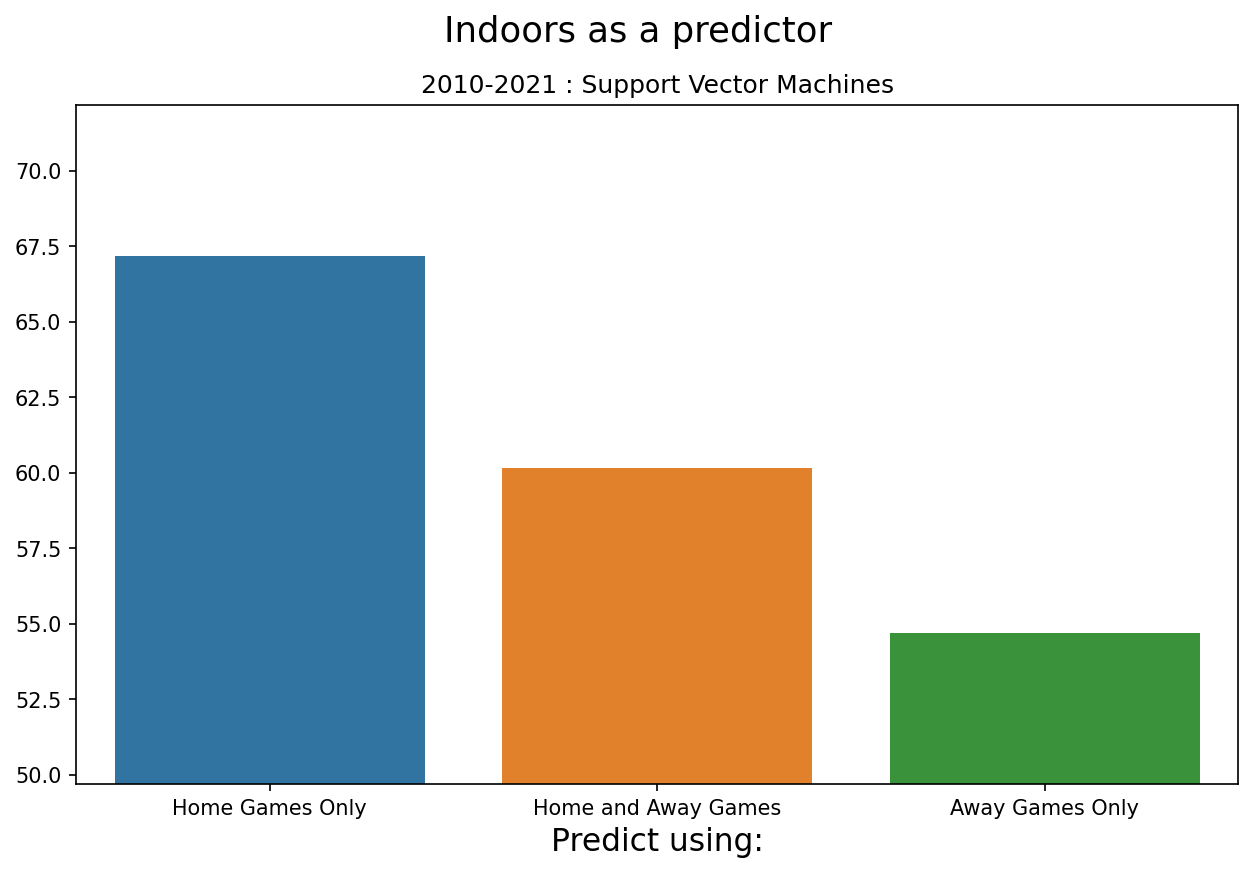

In [1]:
import utils.game_utils as gu

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC


### Output results - helper
def print_results(model, X_test, y_test, y_pred):
  print('---------------')
  acc = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {acc}")

  print('---------------')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

  print('---------------')
  print('Classification Report')
  print(classification_report(y_test, y_pred))
  # plot_confusion_matrix(model, X_test, y_test)
def get_model_from_search(X_train, y_train):
  param_grid = {'C':[0.001,0.01,0.1,0.5,1],
                'kernel':['linear','rbf','poly'],
                'gamma':['scale','auto'],
                'degree':[2,3,4],
                # 'epsilon':[0,0.01,0.1,0.5,1,2]
                }
  model = GridSearchCV(SVC(), param_grid=param_grid)
  model.fit(X_train, y_train)
  print(model.best_params_)
  # -> {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
  return model
def get_model_from_static(X_train, y_train):
  model = SVC(C=1, degree=2, gamma='scale', kernel='poly')
  model.fit(X_train, y_train)
  return model
def estimate_accuracy(df):
  dum_df = pd.get_dummies(df)
  X = dum_df.drop('win', axis=1)
  y = dum_df['win']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

  # to calculate the best parameters
  # model = get_model_from_search(X_train, y_train)

  # to use previously calculated parameters
  model = get_model_from_static(X_train, y_train)

  # now predict
  y_pred = model.predict(X_test)

  print_results(model, X_test, y_test, y_pred)
  return accuracy_score(y_test, y_pred)
def draw_final_outcomes(acc_home, acc_both, acc_away, algorithm):
  plt.figure(figsize=(10,6), dpi=150)
  percs = pd.Series([acc_home, acc_both, acc_away]) * 100
  sns.barplot(x=['Home Games Only', 'Home and Away Games', 'Away Games Only'], y=percs)
  plt.ylim(percs.min() - 5, percs.max() + 5)
  plt.suptitle('Indoors as a predictor', fontsize=17)
  plt.title(f'2010-2021 : {algorithm}')
  plt.xlabel('Predict using:', fontsize=15)
  plt.show();


data_path = '../../../data'
nfld = gu.NFL_Data(data_path)

print("We are using Support Vector Machines to determine if team and is_outdoors is a predictor")

print('------- HOME AND AWAY')
year_df = gu.get_year(nfld.data(), 2020)
df = year_df[['team','is_outdoors','win']]
acc_both = estimate_accuracy(df)

print('------- AWAY ONLY')
year_df = gu.get_year(nfld.data(), 2020)
df = year_df[year_df['home'] == 0]
df = df[['team','is_outdoors','win']]
acc_away = estimate_accuracy(df)

print('------- HOME ONLY')
year_df = gu.get_year(nfld.data(), 2020)
df = year_df[year_df['home'] == 1]
df = df[['team','is_outdoors','win']]
acc_home = estimate_accuracy(df)

draw_final_outcomes(acc_home, acc_both, acc_away, 'Support Vector Machines')